In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timezone

def parse_dst_line(line: str):
    """
    Parse a single IAGA-2002 Dst hourly line.
    Returns a list with one record dict, or empty list if header/comment.
    """

    line = line.strip()

    # Skip headers, comments, blank lines
    if (
        not line
        or line.startswith("#")
        or line.startswith("Format")
        or line.startswith("Source")
        or line.startswith("Station")
        or line.startswith("IAGA")
        or line.startswith("DATE")
    ):
        return []

    parts = line.split()

    # Expected format:
    # DATE TIME DOY DST
    if len(parts) < 4:
        return []

    date_str = parts[0]
    time_str = parts[1]
    dst_str = parts[3]

    # Combine date + time and parse as UTC
    timestamp = datetime.strptime(
        f"{date_str} {time_str}",
        "%Y-%m-%d %H:%M:%S.%f"
    ).replace(tzinfo=timezone.utc)

    dst_value = float(dst_str)

    return {
        "timestamp": timestamp,
        "dst_nT": dst_value
    }

In [47]:
parse = parse_dst_line("2000-01-01 00:00:00.000 001       -45.00")
print(parse)

{'timestamp': datetime.datetime(2000, 1, 1, 0, 0, tzinfo=datetime.timezone.utc), 'dst_nT': -45.0}


In [51]:
records = []
with open("../datasets/WWW_dstae01508718.dat", 'r') as file:
    for line in file:
        if line.endswith("|\n") or line.endswith("DST\n"):
            continue
        data = parse_dst_line(line)
        records.append(data)

records

[{'timestamp': datetime.datetime(2000, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -45.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 1, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -37.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 2, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -37.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 3, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -41.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 4, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -45.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 5, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -39.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 6, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -38.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 7, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -35.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 8, 0, tzinfo=datetime.timezone.utc),
  'dst_nT': -38.0},
 {'timestamp': datetime.datetime(2000, 1, 1, 9, 0, tzinfo=datetime.timezone.utc),


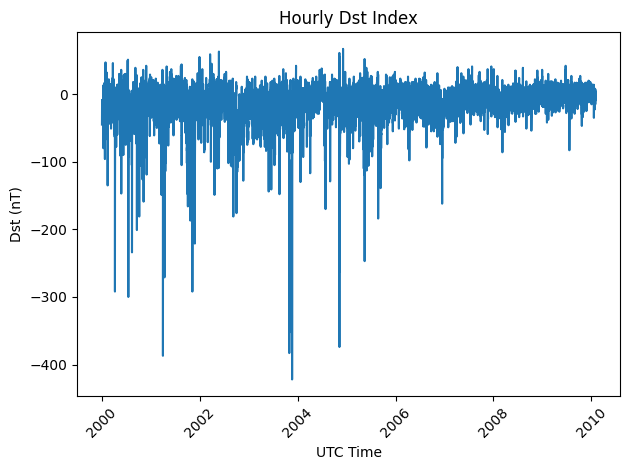

In [55]:
# Convert to DataFrame
df = pd.DataFrame(records)

# Ensure sorted
df = df.sort_values("timestamp")

# Plot
plt.figure()
plt.plot(df["timestamp"], df["dst_nT"])
plt.xlabel("UTC Time")
plt.ylabel("Dst (nT)")
plt.title("Hourly Dst Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

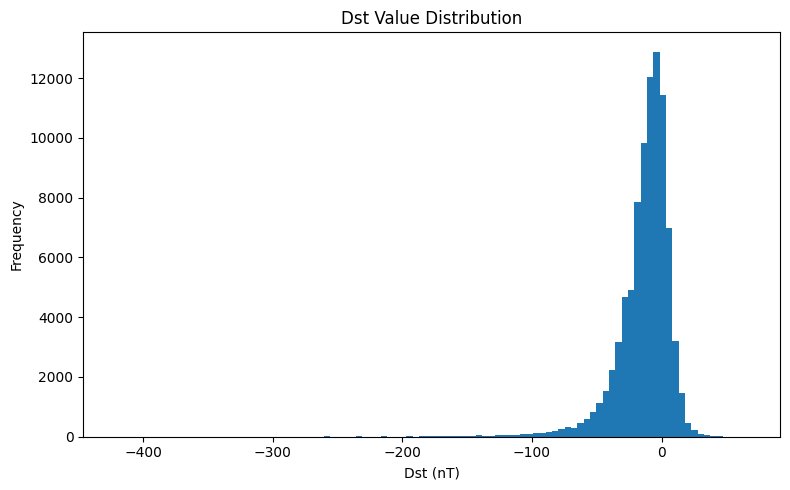

In [57]:
plt.figure(figsize=(8, 5))
plt.hist(df["dst_nT"], bins=100)
plt.xlabel("Dst (nT)")
plt.ylabel("Frequency")
plt.title("Dst Value Distribution")
plt.tight_layout()
plt.show()

In [58]:
print("Total samples:", len(df))

print("Dst <= -50:", (df["dst_nT"] <= -50).sum())
print("Dst <= -100:", (df["dst_nT"] <= -100).sum())
print("Dst <= -200:", (df["dst_nT"] <= -200).sum())

print("\nPercentages:")
print("Storm (<= -50):", 100*(df["dst_nT"] <= -50).mean(), "%")
print("Strong (<= -100):", 100*(df["dst_nT"] <= -100).mean(), "%")
print("Severe (<= -200):", 100*(df["dst_nT"] <= -200).mean(), "%")

Total samples: 88416
Dst <= -50: 4369
Dst <= -100: 850
Dst <= -200: 119

Percentages:
Storm (<= -50): 4.941413318856315 %
Strong (<= -100): 0.9613644589214623 %
Severe (<= -200): 0.1345910242490047 %


In [59]:
df["storm"] = (df["dst_nT"] <= -50).astype(int)

print(df["storm"].value_counts(normalize=True))

storm
0    0.950586
1    0.049414
Name: proportion, dtype: float64
